In [2]:
#%run -i '../../scripts/utility_readblt.py' 'mutau'
#%run -i '../../scripts/utility_readblt_inverseISO.py' 'mutau'

In [1]:
from utility_common import *
from utility_plotter import *
import ROOT
from IPython.display import clear_output
## add plotting option and load plotting parameter table
%matplotlib inline
#%qtconsole --style monokai
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

Welcome to JupyROOT 6.13/02


# 1. Read data and MC as dataframe

In [2]:
selection  = "mutau"
pickledir  = "/mnt/data/zchen/Analysis/pickle/{}/".format(selection)

In [15]:
def prepare_df_list(nbjetcut):
    
    cuts = GetSelectionCut(selection) + "& (nBJets{})".format(nbjetcut)

    Data = LoadDataframe(pickledir + "data2016").query(cuts)
    Fake = LoadDataframe(pickledir + "data2016_inverseISO").query("nBJets{}&(lepton1_pt > 30) & (triggerLepton>0)".format(nbjetcut))
    
    MCzz = LoadDataframe(pickledir + "mcdiboson").query(cuts)
    MCdy = LoadDataframe(pickledir + "mcdy").query(cuts)
    MCt  = LoadDataframe(pickledir + "mct").query(cuts)
    MCtt = LoadDataframe(pickledir + "mctt").query(cuts)
    # signal mc is tt+tW
    MCsg = pd.concat([MCt,MCtt],ignore_index=True)

    MCsgf = MCsg.query('genCategory in [16,21] ') # semilep and had
    MCsg0 = MCsg.query('genCategory in [1,2,3, 4,5,6,7,8,9, 10,11,12]') #other lep
    MCsg1 = MCsg.query('genCategory in [17]') #muh
    MCsg2 = MCsg.query('genCategory in [18,19,20]') #tauh
    MCsg3 = MCsg.query('genCategory in [13,14,15]') #mutau
    
    return [ Fake,MCzz,MCdy,MCsgf,MCsg0,MCsg1,MCsg2,MCsg3,Data],MCt,MCtt

# 2. Plot kinematics

In [16]:
pp = pd.read_csv("plotparameters.csv")
label_list = ["Fake","Diboson","V+Jets",r'$tt/tW \rightarrow l + h$ (other)',
              r'$tt/tW \rightarrow l + l$ (other) ',
              r'$tt/tW \rightarrow \mu + h$', 
              r'$tt/tW \rightarrow \tau + h$',
              r'$tt/tW \rightarrow \mu + \tau$',
              'data']
color_list = ["gray","#a32020","#e0301e","#eb8c00","gold","#49feec","deepskyblue","mediumpurple","k"]

KeyboardInterrupt: 

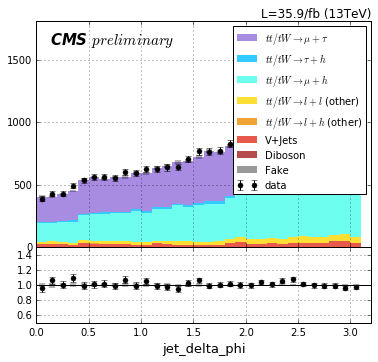

In [17]:
for nbjetcut in ["==1",">1",">=1"]:
    ## 1. prepare df_list
    df_list,_,__ = prepare_df_list(nbjetcut)
    
    ## 2. make plots
    plotoutdir = GetPlotDir(selection, nbjetcut)
    print(plotoutdir)
    for index, row in pp.iterrows():
        
        v,a,b,step,xl = row["var"],row["lower"],row["upper"],row["step"],row["xlabel"]
        if v == "triggerLepton" :
            continue
        plotter = SelectionPlotter(v,a,b,step,df_list,adjust=[0.0,1,1,1,1,1,1,1],hasFake=True)
        plotter.settingPlot(xl,label_list,color_list)
        plotter.makePlot(plotoutdir)
        # print out process
        print("making plots nbjet{0}: {1}/{2}".format(nbjetcut,index,len(pp)))
        clear_output(wait=True)
        plt.close()
        
print('finish all making plots')

# 3. Counting

In [18]:
nbjetcut = ">=1"
df_list,MCt,MCtt = prepare_df_list(nbjetcut)
ctr = SelectionCounter()

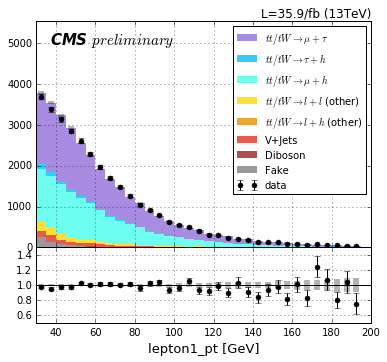

In [19]:
plt.rc("figure",facecolor="w",figsize=(6,4))

v,a,b,step,xl = "lepton1_pt",30,200,5,"lepton1_pt [GeV]"
plotter = SelectionPlotter(v,a,b,step,df_list,adjust=[0.05,1,1,1,1,1,1,1],hasFake=True)
plotter.settingPlot(xl,label_list,color_list)
plotter.makePlot()

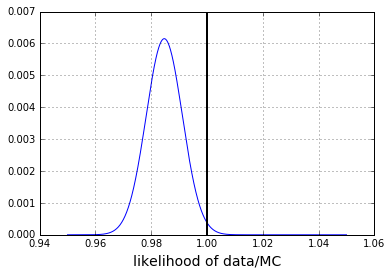

In [20]:
ratio = plotter.hdata/plotter.mctot
err   = sqrt((plotter.hdata**0.5/plotter.mctot)**2 + (plotter.mcerr/plotter.mctot)**2)


x = np.linspace(0.95,1.05,1000)
l = np.ones_like(x)
for i in range(len(ratio)):
    norm = (1/sqrt(2*np.pi*err[i]**2))
    l *= norm*np.exp(-(x-ratio[i])**2/(2*err[i]**2))
    #nll = nll+(x-ratio[i])**2/(2*err[i]**2)
l = l/np.sum(l)

plt.plot(x,l)
plt.xlabel("likelihood of data/MC",fontsize=14)
plt.axvline(1,c="k",lw=2)
plt.grid()

np.save("dataMCRatio/mutau_095to105", l)

In [8]:
print("(nBJets{})".format(nbjetcut))

print("MCtt: {}".format(ctr.countSlt_ByTauDecay(MCtt,withweights=False)) )
print("MCtt width: {}".format(ctr.countSlt_ByTauDecay(MCtt,withweights=True)) )

print("MCt : {}".format(ctr.countSlt_ByTauDecay(MCt, withweights=False)) )
print("MCt width: {}".format(ctr.countSlt_ByTauDecay(MCt, withweights=True)) )

(nBJets==1)
MCtt: [1, 620, 1215, 0, 22, 13, 2, 4647, 10, 0, 84, 5, 272, 203, 73217, 7, 55273, 3, 3576, 113, 80]
MCtt width: [0.9693017601966858, 563.900709662179, 1123.462443148368, 0.0, 20.467483952641487, 11.433428518474102, 1.4426546096801758, 4237.633058314968, 8.99245697259903, 0.0, 78.31837746873498, 4.678441762924194, 242.2870167910587, 182.67167523689568, 67324.39151087328, 6.758560597896576, 51132.89884656748, 2.928499698638916, 3307.5886695944355, 103.87777189537883, 70.52261336054653]
MCt : [0, 1, 8, 0, 0, 1, 0, 36, 0, 0, 0, 0, 0, 1, 539, 0, 545, 0, 35, 0, 0]
MCt width: [0.0, 0.9550322890281676, 6.934958502650261, 0.0, 0.0, 1.1225700378417969, 0.0, 32.97304755449295, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9780113101005554, 512.1993020465598, 0.0, 509.96827697660774, 0.0, 33.23749169707298, 0.0, 0.0]


In [9]:
ctr.countSlt_Scaled(df_list)

data:28078.0
TotalMC:46207.04222070937
------ MC break down ------
[1.88970000e+04 8.12623609e+01 1.11286138e+03 1.48570757e+01
 1.21786824e+03 1.04924413e+04 6.99597605e+02 1.36911543e+04]


In [11]:
for thisdf in [df_list[1],df_list[2], MCt, MCtt, df_list[-1]]:
    n = np.sum(thisdf.eventWeight)
    nerr = np.sum(thisdf.eventWeight**2)**0.5
    print('{:.2f},{:.2f}'.format(n,nerr))

81.26,7.71
1112.86,46.47
1426.55,42.72
24689.37,68.22
28078.00,167.56


In [12]:
# print Generator information
f = ROOT.TFile("../../data/root/2016MC.root")
print("MCtt : {}".format(ctr.countGen_ByTauDecay(f,'ttbar_inclusive')) )
temp = np.array(ctr.countGen_ByTauDecay(f,'t_tw'))
temp+= np.array(ctr.countGen_ByTauDecay(f,'tbar_tw'))
print("MCt  : {}".format(list(temp)) )

MCtt : [1811409.0, 1811532.0, 3620281.0, 57057.0, 54227.0, 111125.0, 418126.0, 407605.0, 763147.0, 642646.0, 626108.0, 2350887.0, 643368.0, 627277.0, 2353727.0, 22670017.0, 22653517.0, 4016590.0, 3923504.0, 14718933.0, 70930278.0]
MCt  : [23105.0, 23040.0, 46342.0, 694.0, 717.0, 1420.0, 5260.0, 5158.0, 9727.0, 8199.0, 8029.0, 30054.0, 8163.0, 8006.0, 29970.0, 290101.0, 289467.0, 50864.0, 50050.0, 187515.0, 904067.0]


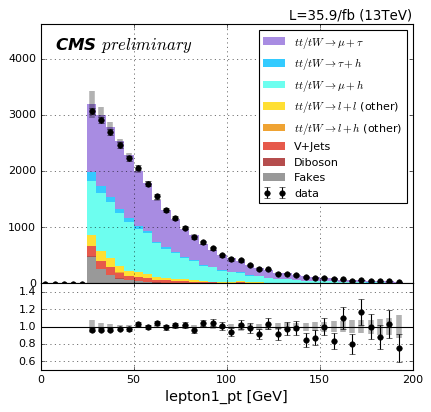